# Tutorial - Graphs with Julia

The goal is not to be extensive. But showcase some of the functionalities in LightGraphs.jl.

In [223]:
using Pkg

In [225]:
using LightGraphs, GraphPlot, SimpleWeightedGraphs, LinearAlgebra, DataFrames, Random, CSV, Colors
ENV["COLUMNS"] = 2000

2000

First, let's import the data_example.csv file. Suppose that each column represents a person, and each line represents an attribute.

We then intend to create a graph to analyze the similarities between each person, by creating an edge when they share an attribute.

In [206]:
Random.seed!(7)
df = DataFrame(rand([0,1],10,20));

### Creating the first graph

The first step is to create the graph (object), by choosing the number of nodes that compose it.

In [207]:
g = SimpleWeightedGraph(ncol(df))

{20, 0} undirected simple Int64 graph with Float64 weights

Next we add the edges that connect the nodes. For our dataset, an edge must be added each time two nodes share an attribute,
which means that we add an edge when both columns have a 1 in at least one similar row. For example, the first and second columns
both have 1's in the first row, hence, we create an edge.

In [208]:
ew = Int[]
pairings = [] 
for i in 1:ncol(df), j in i+1:ncol(df) # iterate over all combinations of columns
    w = dot(df[!, i], df[!, j])        # calculate how many times (i,j) occurs
    if w > 0
        push!(ew, w)
        add_edge!(g, i, j, w)
        push!(pairings,[i,j])
    end
end

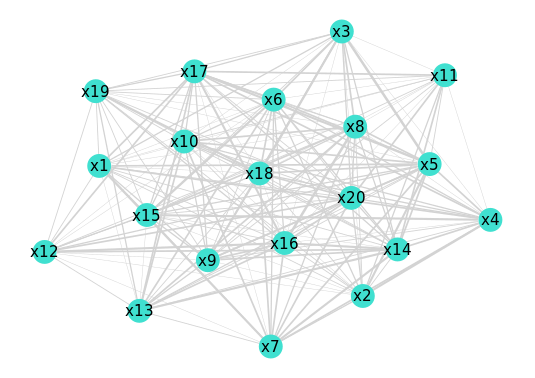

In [221]:
gplot(g,nodelabel=names(df),edgelinewidth=ew)

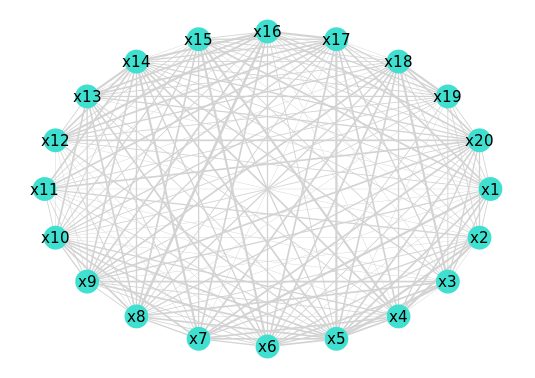

In [219]:
gplot(g,nodelabel=names(df),edgelinewidth=ew,layout=circular_layout)